### Practical 6
### Ньяти Каелиле БВТ2201

### Exercise 1

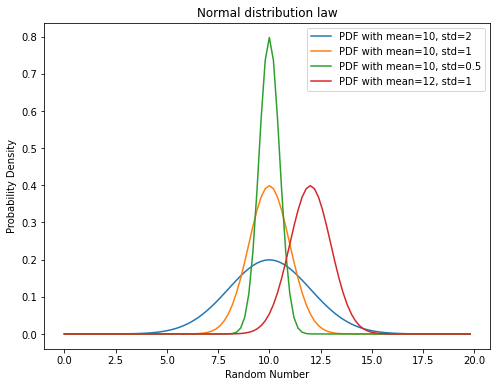

In [116]:
import math
import matplotlib.pyplot as plt

# Define standard deviations and expectations
exp_values = [10, 10, 10, 12]
std_values = [2, 1, 0.5, 1]


def normal_dis_function(std, expectation, x):
    part_1 = 1 / (std * (math.sqrt(2 * math.pi)))  # standard deviation
    part_2 = math.exp((-1 / 2) * (((x - expectation) / std) ** 2))  # expectation
    result = part_1 * part_2
    return result


def cdf_function(x, std=2, expectation=10):
    # Extend the x range to better capture the full area
    left_boundary = 0
    right_boundary = 20
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]  # List of x values

    # Calculate PDF values for the x_values range
    pdf_values = [normal_dis_function(std, expectation, x_val) for x_val in x_values]

    # Calculate CDF value for the input 'x'
    cumulative_sum = 0
    dx = x_values[1] - x_values[0]  # Step size

    if x <= left_boundary:
        return 0.0  # CDF is 0 below the range
    if x >= right_boundary:
        return 1.0  # CDF is 1 above the range
    
    # Loop through the PDF values and compute the cumulative sum until we reach the desired 'x'
    for i, pdf in enumerate(pdf_values):
        cumulative_sum += pdf * dx
        if x_values[i] >= x:
            break

    # Normalize the CDF to go from 0 to 1
    total_area = sum(pdf_values) * dx  # Total area under the curve (approximation)
    normalized_cdf = cumulative_sum / total_area  # Normalize to the total area under the curve

    return normalized_cdf



def draw_pdf(left_boundary, right_boundary):
    # Create the histogram plot
    plt.figure(figsize=(8, 6))

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]

    # Loop over each pair of std and expectation values
    for std, expectation in zip(std_values, exp_values):
        y_values = [normal_dis_function(std, expectation, x) for x in x_values]
        plt.plot(x_values, y_values, label=f"PDF with mean={expectation}, std={std}")

    # Labeling the axes
    plt.title("Normal distribution law")
    plt.xlabel("Random Number")
    plt.ylabel("Probability Density")
    plt.legend()

    # Show the plot
    plt.show()

# Define boundaries and number of plots
left_boundary = 0  # Minimum boundary of the range
right_boundary = 20  # Maximum boundary of the range

draw_pdf(left_boundary, right_boundary)



### Exercise 2

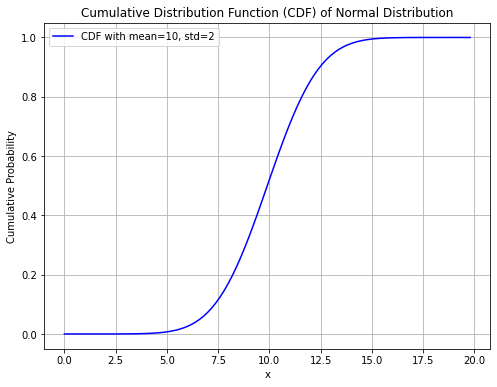

In [117]:
def draw_cdf(left_boundary, right_boundary):

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]

    cdf_values = [cdf_function(x) for x in x_values]  # Use cdf_function to get a single CDF value for each x

    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, cdf_values, color='blue', label=f"CDF with mean={exp_values[0]}, std={std_values[0]}")
    plt.title("Cumulative Distribution Function (CDF) of Normal Distribution")
    plt.xlabel("x")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True)
    plt.show()



draw_cdf(left_boundary, right_boundary)
#cdf_function(10) #for testing if cdf function is giving expected results


### Exercise 3

#### части 1 и 2

In [118]:
def GetArg(F, minArg, maxArg, Value, eps):
    minVal= F(minArg)
    maxVal= F(maxArg)

    while abs((maxArg - minArg)/maxArg) > eps:
        midArg = (minArg + maxArg)/2
        midVal = F(midArg)

        if midVal > Value:
            maxArg = midArg
            maxVal = midVal
        else:
            minArg = midArg
            minVal = midVal
            
    return (minArg + maxArg)/2



def GetTabF(F, minArg, maxArg, PointsCount):
    # Calculate the range of the function
    minVal = F(minArg)
    maxVal = F(maxArg)

    # Calculate the step size for dividing the CDF range
    dVal = (maxVal - minVal) / (PointsCount - 1)

    # Initialize lists to store XTab and YTab
    YTab = [minVal]
    XTab = [minArg]
    
    # Loop to populate intermediate points
    for i in range(1, PointsCount - 2):
        YTab_i = minVal + dVal * i  # Calculate the YTab value
        XTab_i = GetArg(F, minArg, maxArg, YTab_i, 10**-15)  # Find the corresponding XTab value

        YTab.append(YTab_i)
        XTab.append(XTab_i)
    
    YTab.append(maxVal) # YTab[PointsCount-1]= maxVal
    XTab.append(maxArg) # XTab[PointsCount-1]= maxArg

    print(f"YTab={YTab}")
    print(f"XTab={XTab}")

    
    return XTab, YTab


#### часть 3

YTab=[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 1.0]
XTab=[0, 5.200000000000003, 5.599999999999998, 5.999999999999998, 6.399999999999999, 6.6, 6.6, 6.799999999999999, 7.0, 7.199999999999999, 7.199999999999999, 7.4, 7.4, 7.6, 7.6, 7.800000000000001, 7.800000000000001, 7.800000000000001, 8.0, 8.0, 8.200000000000001

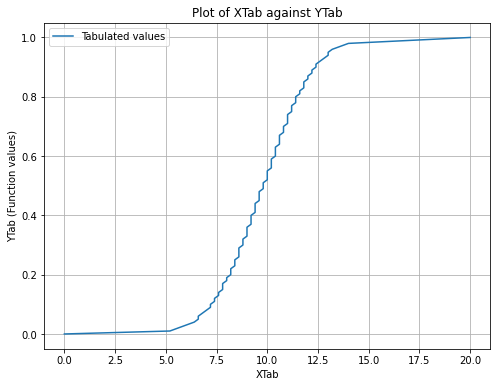

In [119]:
expectation= 10
std=2


# Get the tabulated data
minArg = expectation - 10
maxArg = expectation + 10
TabSize = 101

 # Get the XTab and YTab values
XTab, YTab = GetTabF(cdf_function, minArg, maxArg, TabSize)

def plot_xtab_ytab(XTab, YTab):
   
    plt.figure(figsize=(8, 6))
    plt.plot(XTab, YTab, label="Tabulated values")
    
    plt.title("Plot of XTab against YTab")
    plt.xlabel("XTab")
    plt.ylabel("YTab (Function values)")
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

plot_xtab_ytab(XTab, YTab)



#### часть 4

In [120]:
def Model_N(XTab, YTab, p):
    for i in range(1, len(XTab)):
        if YTab[i-1] <= p <= YTab[i]:
            # Linear interpolation formula
            y = (
                XTab[i-1] * (p - YTab[i]) / (YTab[i-1] - YTab[i]) +
                XTab[i] * (p - YTab[i-1]) / (YTab[i] - YTab[i-1])
            )
            return y
    return None  # Return None if p is out of bounds


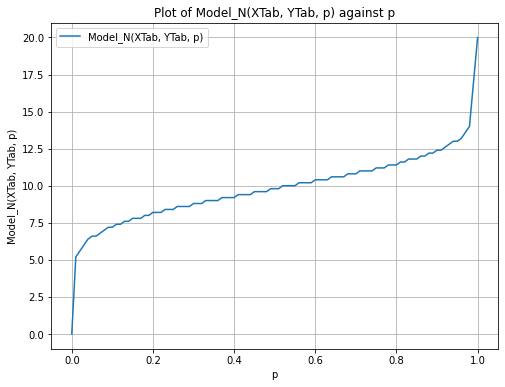

In [121]:
def plot_model_N(XTab, YTab):
    left_boundary = 0
    right_boundary = 1
    p_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(101)]

    # Compute Model_N for each p
    model_N_values = [Model_N(XTab, YTab, p) for p in p_values]

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(p_values, model_N_values, label="Model_N(XTab, YTab, p)")

    plt.title("Plot of Model_N(XTab, YTab, p) against p")
    plt.xlabel("p")
    plt.ylabel("Model_N(XTab, YTab, p)")

     # Adjust the legend location to the right of the plot
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.grid(True)
    plt.show()


plot_model_N(XTab, YTab)

#### часть 5

In [122]:
import random

# Define the different n values
n_values = [10**3, 10**4, 10**5, 10**6]

# Dictionary to store results for each n
ParArr_results = {}

for n in n_values:
    p_values = [random.uniform(0, 1) for _ in range(n)]  # Generate random p values

    # Compute Model_N for each p and store in the dictionary
    ParArr_results[n] = [Model_N(XTab, YTab, p) for p in p_values]

    # Output statistics
    print(f"Results for n = {n}:")
    #print(f"Series: {ParArr_results[n]}")
    print(f"Max: {max(ParArr_results[n])}")
    print(f"Min: {min(ParArr_results[n])}")
    print()


Results for n = 1000:
Max: 19.50204685636749
Min: 1.180510849074757

Results for n = 10000:
Max: 19.996754922807472
Min: 0.12236751359184345

Results for n = 100000:
Max: 19.999656230044664
Min: 0.0012683617229836137

Results for n = 1000000:
Max: 19.999678120303603
Min: 0.00036338356923515413



### Exercise 4

#### часть 1

In [123]:
def GetFreqDistr(RParamsArr, A, B, IntervalsCount):
    dY = (B-A)/IntervalsCount

    Freq = [0] * IntervalsCount

    for j in range(len(RParamsArr)-1):
        Yc= RParamsArr[j]
        fN = math.floor(Yc/dY)

        Freq[fN]+=1
        
    #Normalizing the frequency values
    for i in range(IntervalsCount-1):
        Freq[i] = Freq[i]/(len(RParamsArr)*dY)

    return Freq

#### часть 2

In [ ]:
A= 0
B= 20
K= 100

resX_values=[]

for k in range(K):
    resX= ((B-A)/K)*(0.5 + k)
    resX_values.append(resX)

resY_e3= GetFreqDistr(ParArr_results[10**3], A, B, K)
resY_e4= GetFreqDistr(ParArr_results[10**4], A, B, K)
resY_e5= GetFreqDistr(ParArr_results[10**5], A, B, K)
resY_e6= GetFreqDistr(ParArr_results[10**6], A, B, K)

resY_list= [resY_e3, resY_e4, resY_e5, resY_e6]

#print(resY_e4)
#print(ParArr_results[10**6])
#print(resX_values)

100


 Histogram and pdf for resY_e3


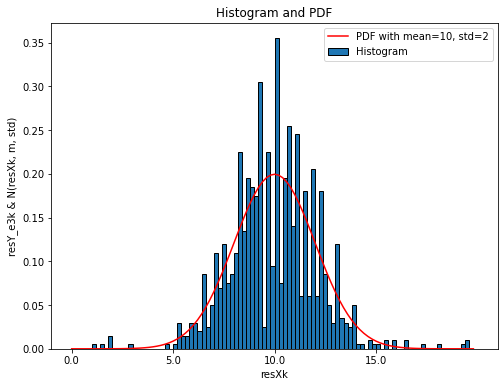

 Histogram and pdf for resY_e4


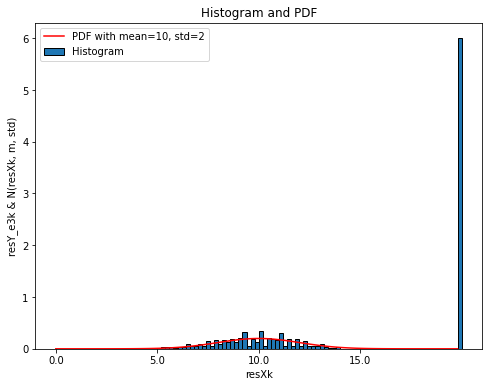

 Histogram and pdf for resY_e5


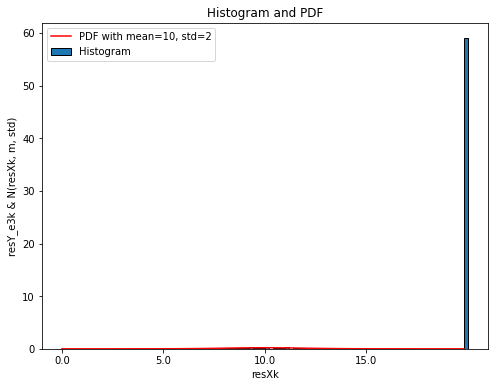

 Histogram and pdf for resY_e6


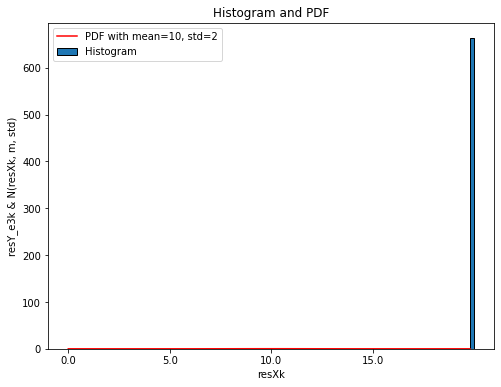

In [135]:
def draw_pdf_and_hist(left_boundary, right_boundary, num_plots, relative_frequencies, std=2, expectation=10):
    # Create the histogram plot
    plt.figure(figsize=(8, 6))

    bar_width = (right_boundary - left_boundary) / num_plots

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)] 
    y_values = [normal_dis_function(std, expectation, x) for x in x_values]
    plt.plot(x_values, y_values, label=f"PDF with mean={expectation}, std={std}", color='red')


    
     # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]



    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    
    
     # Set x-ticks every 5 units
    xticks = range(0, right_boundary, 5)  # Labels every 5 units
    plt.xticks(xticks)  # Set the x-ticks
        
    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("resXk")
    plt.ylabel("resY_e3k & N(resXk, m, std)")
    plt.legend()

    # Show the plot
    plt.show()


left_boundary = 0  
right_boundary = 20  


for n, resY in enumerate(resY_list, start=3):  # Enumerate starting from 3 for proper labeling
    print(f" Histogram and pdf for resY_e{n}")
    draw_pdf_and_hist(left_boundary, right_boundary, K, resY)


#### часть 3

In [137]:
def std_hist(std, expectation, resY_no, K):
    result = []
    for i in range(K):
        const =  ((normal_dis_function(std, expectation, resX_values[i]) - resY_no[i])**2) / K
        result.append(const)
        #print(result)
    return sum(result)

print(f"std for resY_e3[i] and N(resXi, m, std): {std_hist(std, expectation, resY_e3,K)}")
print(f"std for resY_e3[i] and N(resXi, m, std): {std_hist(std, expectation, resY_e4,K)}")
print(f"std for resY_e3[i] and N(resXi, m, std): {std_hist(std, expectation, resY_e5,K)}")
print(f"std for resY_e3[i] and N(resXi, m, std): {std_hist(std, expectation, resY_e6,K)}")

std for resY_e3[i] and N(resXi, m, std): 0.0016239842925676634
std for resY_e3[i] and N(resXi, m, std): 0.3615953793931004
std for resY_e3[i] and N(resXi, m, std): 34.81159392161204
std for resY_e3[i] and N(resXi, m, std): 4395.691580959959
